# Import Package

In [1]:
## Import Packages
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import os
%matplotlib inline

# Import Data

In [2]:
# import data diabetes
dataset = pd.read_csv("https://raw.githubusercontent.com/taqiyyaghazi/knn_diabetes/main/diabetes.csv")

In [3]:
# Melihat 5 data awal
dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
dataset['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [5]:
dataset.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

# Data Preparation

## Cek Missing Value

In [6]:
dataset.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

## Cek Tipe Data

In [7]:
dataset.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

## Cek Data Outlier

### Nilai Outlier dengan Boxplot

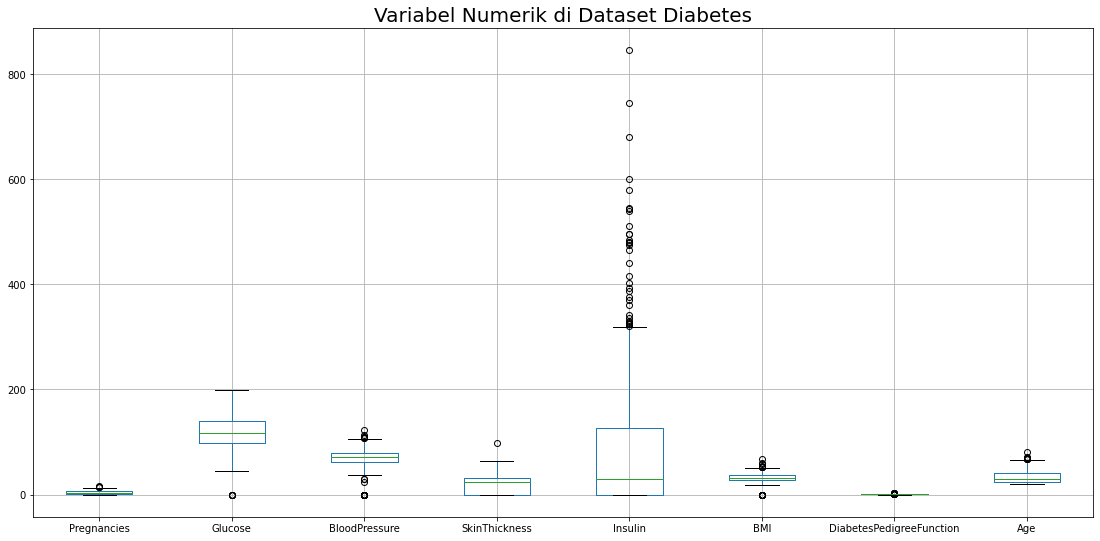

In [8]:
cols = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']
plt.figure(figsize=(19,9))
dataset[cols].boxplot()
plt.title("Variabel Numerik di Dataset Diabetes", fontsize=20)
plt.show()

### Nilai Outlier dengan Z-Score

Sumber : https://www.analyticsvidhya.com/blog/2021/05/detecting-and-treating-outliers-treating-the-odd-one-out/

In [9]:
def detect_outliers_zscore(data):
    outliers = []
    thres = 3
    mean = np.mean(data)
    std = np.std(data)
    # print(mean, std)
    for i in data:
        z_score = (i-mean)/std
        if (np.abs(z_score) > thres):
            outliers.append(i)
    return outliers
data_outlier = {}
for col in cols:
  data_outlier[col] = detect_outliers_zscore(dataset[col])
  print("Outliers from Z-scores method (", col, ")", len(data_outlier[col]), "outlier :", data_outlier[col])



Outliers from Z-scores method ( Pregnancies ) 4 outlier : [15, 17, 14, 14]
Outliers from Z-scores method ( Glucose ) 5 outlier : [0, 0, 0, 0, 0]
Outliers from Z-scores method ( BloodPressure ) 35 outlier : [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Outliers from Z-scores method ( SkinThickness ) 1 outlier : [99]
Outliers from Z-scores method ( Insulin ) 18 outlier : [543, 846, 495, 485, 495, 478, 744, 680, 545, 465, 579, 474, 480, 600, 440, 540, 480, 510]
Outliers from Z-scores method ( BMI ) 14 outlier : [0.0, 0.0, 0.0, 0.0, 0.0, 67.1, 0.0, 0.0, 59.4, 0.0, 0.0, 57.3, 0.0, 0.0]
Outliers from Z-scores method ( DiabetesPedigreeFunction ) 11 outlier : [2.2880000000000003, 1.893, 1.781, 2.329, 1.476, 2.137, 1.7309999999999999, 1.6, 2.42, 1.699, 1.6980000000000002]
Outliers from Z-scores method ( Age ) 5 outlier : [69, 72, 81, 70, 69]


### Nilai Outlier dengan IQR

In [10]:

def detect_outliers_iqr(data):
    outliers = []
    data = sorted(data)
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)
    # print(q1, q3)
    IQR = q3-q1
    lwr_bound = q1-(1.5*IQR)
    upr_bound = q3+(1.5*IQR)
    # print(lwr_bound, upr_bound)
    for i in data: 
        if (i<lwr_bound or i>upr_bound):
            outliers.append(i)
    return outliers
data_outlier = {}
for col in cols:
  data_outlier[col] = detect_outliers_iqr(dataset[col])
  print("Outliers from Z-scores method (", col, ")", len(data_outlier[col]), "outlier :", data_outlier[col])

Outliers from Z-scores method ( Pregnancies ) 4 outlier : [14, 14, 15, 17]
Outliers from Z-scores method ( Glucose ) 5 outlier : [0, 0, 0, 0, 0]
Outliers from Z-scores method ( BloodPressure ) 45 outlier : [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 24, 30, 30, 108, 108, 110, 110, 110, 114, 122]
Outliers from Z-scores method ( SkinThickness ) 1 outlier : [99]
Outliers from Z-scores method ( Insulin ) 34 outlier : [321, 325, 325, 325, 326, 328, 330, 335, 342, 360, 370, 375, 387, 392, 402, 415, 440, 465, 474, 478, 480, 480, 485, 495, 495, 510, 540, 543, 545, 579, 600, 680, 744, 846]
Outliers from Z-scores method ( BMI ) 19 outlier : [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 52.3, 52.3, 52.9, 53.2, 55.0, 57.3, 59.4, 67.1]
Outliers from Z-scores method ( DiabetesPedigreeFunction ) 29 outlier : [1.213, 1.222, 1.224, 1.224, 1.251, 1.258, 1.268, 1.2819999999999998, 1.2919999999999998, 1.318, 1.321, 1.3530000000000002,

## Imputasi Data Outlier

### Imputasi Data Outlier BloodPressure

In [11]:
mean_blood = np.mean(dataset['BloodPressure'])
mean_blood

69.10546875

In [12]:
for i in data_outlier['BloodPressure']:
  dataset['BloodPressure'] = np.where(dataset['BloodPressure']==i, mean_blood, dataset['BloodPressure'])

detect_outliers_iqr(dataset['BloodPressure'])

[38.0, 106.0, 106.0, 106.0]

### Imputasi Data Outlier Insulin

In [13]:
median_insulin = np.median(dataset['Insulin'])
median_insulin

30.5

In [14]:
for i in data_outlier['Insulin']:
  dataset['Insulin'] = np.where(dataset['Insulin']==i, median_insulin, dataset['Insulin'])

detect_outliers_iqr(dataset['Insulin'])

[277.0,
 278.0,
 280.0,
 284.0,
 285.0,
 285.0,
 291.0,
 293.0,
 293.0,
 300.0,
 304.0,
 310.0,
 318.0]

### Imputasi Data Outlier Diabetes Pedigree Function

In [15]:
median_DPF = np.median(dataset['DiabetesPedigreeFunction'])
median_DPF

0.3725

In [16]:
for i in data_outlier['DiabetesPedigreeFunction']:
  dataset['DiabetesPedigreeFunction'] = np.where(dataset['DiabetesPedigreeFunction']==i, median_DPF, dataset['DiabetesPedigreeFunction'])

detect_outliers_iqr(dataset['DiabetesPedigreeFunction'])

[1.095,
 1.0959999999999999,
 1.101,
 1.114,
 1.127,
 1.136,
 1.138,
 1.1440000000000001,
 1.1540000000000001,
 1.159,
 1.162,
 1.1740000000000002,
 1.182,
 1.189,
 1.1909999999999998]

### Imputasi Data Outlier BMI

In [17]:
mean_BMI = np.mean(dataset['BMI'])
mean_BMI

31.992578124999977

In [18]:
for i in data_outlier['BMI']:
  dataset['BMI'] = np.where(dataset['BMI']==i, mean_BMI, dataset['BMI'])

detect_outliers_iqr(dataset['BMI'])

[49.6, 49.7, 50.0]

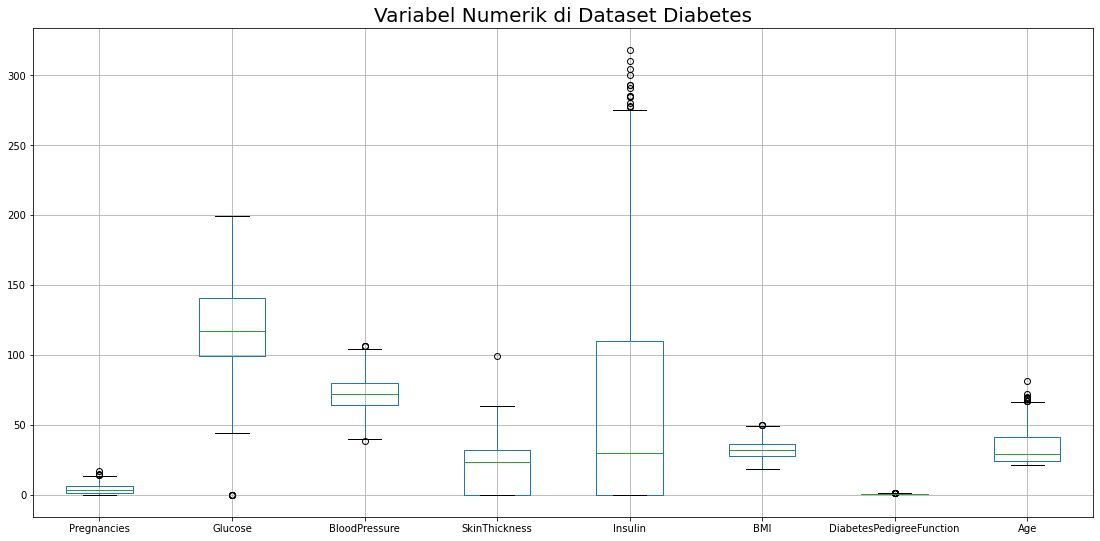

In [19]:
plt.figure(figsize=(19,9))
dataset[cols].boxplot()
plt.title("Variabel Numerik di Dataset Diabetes", fontsize=20)
plt.show()

# Train Model



# Data Split


In [21]:
# Inisiasi variabel independen dan dependen
X = dataset.drop('Outcome', axis=1)
y = dataset['Outcome']

In [ ]:
# Mengubah data outlier
# X.replace(to_replace=0, value=X.mean(), inplace=True)

In [32]:
# Import fungsi train_test_split 
from sklearn.model_selection import train_test_split

# Membagi dataset ke training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101) # 70% training and 30% test

# Training Model


In [33]:
# Import modul KNN
from sklearn.neighbors import KNeighborsClassifier

In [51]:
error = []
iterasi = 60
# Menghitung eror dari K antara 1-40 
for i in range(1, iterasi):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

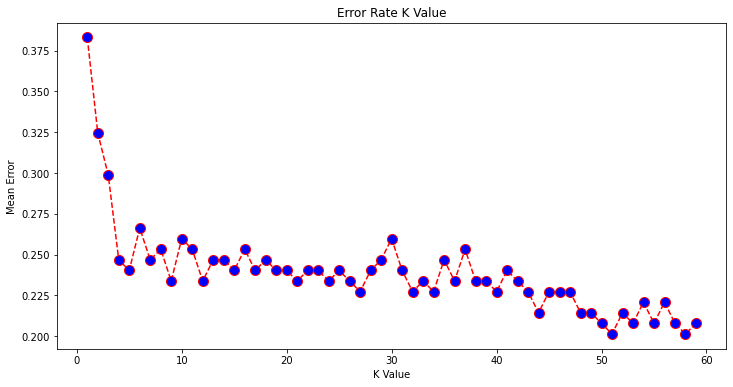

In [52]:
# Membuat Grafik Eror Rate
plt.figure(figsize=(12, 6))
plt.plot(range(1, iterasi), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')
plt.show()

In [59]:
# Melatih model dengan data training
model = KNeighborsClassifier(n_neighbors=59, leaf_size=30)
model.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=59, p=2,
                     weights='uniform')

In [60]:
# Memprediksi data testing dengan model 
y_pred = model.predict(X_test)

# Accuracy Score

In [58]:
#Import modul scikit-learn metrics 
from sklearn import metrics
# Model Accuracy
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7922077922077922
